# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We {**2110ACDS_VM13**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Libraries for data preparation and model building
import sklearn

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = 

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df = pd.read_csv (r'C:\Users\Dorcas Oduor\Documents\EDSA\Advanced Regression\Predict\Advanced-Regression-Starter-Data-3036\Advanced-Regression-Starter-Data\df_train.csv',  index_col=0)
df.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [3]:
df.shape

(8763, 48)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [5]:
df.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

In [6]:
df.Valencia_pressure.describe()

count    6695.000000
mean     1012.051407
std         9.506214
min       972.666667
25%      1010.333333
50%      1015.000000
75%      1018.000000
max      1021.666667
Name: Valencia_pressure, dtype: float64

In [7]:
df.Valencia_pressure.mode()

0    1018.0
dtype: float64

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [8]:
# look at data statistics
df.describe()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,12.666667,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [9]:
# plot relevant feature interactions
df.skew()


Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_max        0.082672
Valencia_temp 

In [10]:
df.kurtosis()

Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0.515989
Madrid_pressure            2

In [11]:
# evaluate correlation
df.corr()

,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Madrid_wind_speed,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,0.294640,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,0.069997,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,0.347966,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,-0.138625,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,-0.058518,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,0.094019,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,0.275317,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,0.136591,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,0.177393,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800
Barcelona_wind_speed,0.294640,0.069997,0.347966,-0.138625,-0.058518,0.094019,0.275317,0.136591,0.177393,1.000000,...,0.084209,0.116240,0.123403,0.120361,0.109268,0.109692,0.130367,0.089365,0.084679,-0.103633


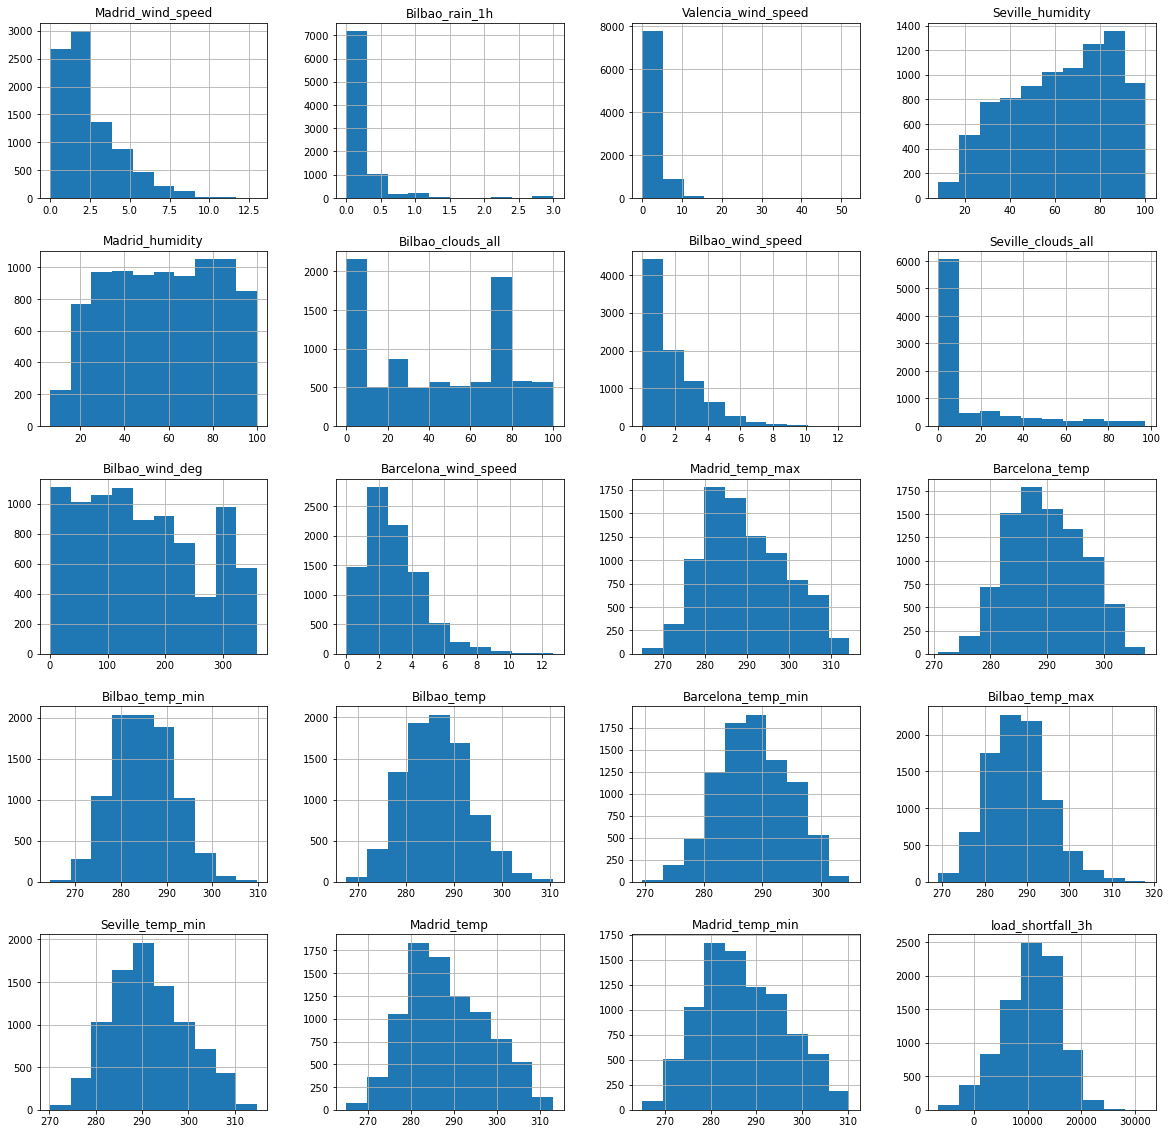

In [12]:
# have a look at feature distributions
features = ['Madrid_wind_speed', 'Bilbao_rain_1h','Valencia_wind_speed','Seville_humidity','Madrid_humidity','Bilbao_clouds_all','Bilbao_wind_speed','Seville_clouds_all','Bilbao_wind_deg','Barcelona_wind_speed','Madrid_temp_max','Barcelona_temp','Bilbao_temp_min','Bilbao_temp','Barcelona_temp_min','Bilbao_temp_max','Seville_temp_min','Madrid_temp','Madrid_temp_min','load_shortfall_3h']

df[features].hist(figsize=(20,20));


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [13]:
# remove missing values/ features
def drop_columns(input_df, threshold, unique_value_threshold):
    
    for col in input_df:
        missing_p = input_df[col].isnull().sum() / len(input_df[col]) * 100            
            
        if missing_p > threshold:
            input_df.drop(col, axis=1, inplace=True)            
    
    return input_df

In [14]:
drop_columns(df, 80, 15)

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.000000,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,2017-12-31 09:00:00,1.000000,level_6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,80.000000,...,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,2017-12-31 12:00:00,5.000000,level_6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,75.000000,...,283.483333,287.483333,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2266.666667
8760,2017-12-31 15:00:00,6.333333,level_9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,33.333333,...,285.150000,289.816667,283.816667,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000
8761,2017-12-31 18:00:00,7.333333,level_8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,51.666667,...,283.483333,287.523333,278.816667,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000


In [15]:
df.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

In [16]:
#Replacing missing values in Valencia_pressure with the mean.
#As observed from the kurtosis, the data is not widely sparsed and therefore the mean is a valid replacement for null values.
df_train = df.copy()
V_pressure_mean = df_train['Valencia_pressure'].mean()
df_train['Valencia_pressure'].fillna(value = V_pressure_mean, inplace = True)

In [17]:
# create new features
# converting the Bilbao wind degree measurements to levels

bin_labels = ['level_1','level_2','level_3','level_4','level_5','level_6','level_7','level_8','level_9','level_10']
df_train['Bilbao_wind_deg_levels'] = pd.qcut(df_train['Bilbao_wind_deg'], q=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1], labels = bin_labels)
Bilbao = ['Bilbao_wind_deg','Bilbao_wind_deg_levels']
df_train[Bilbao].head()


,Bilbao_wind_deg,Bilbao_wind_deg_levels
0,223.333333,level_8
1,221.000000,level_8
2,214.333333,level_7
3,199.666667,level_7
4,185.000000,level_7


In [18]:
# converting the Bilbao wind degree measurements to levels

bin_labels = ['level_1','level_2','level_3','level_4','level_5','level_6','level_7','level_8','level_9','level_10']
df_train['Barcelona_wind_deg_levels'] = pd.qcut(df_train['Barcelona_wind_deg'], q=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1], labels = bin_labels)
Barcelona = ['Barcelona_wind_deg_levels','Barcelona_wind_deg']
df_train[Barcelona].head()

,Barcelona_wind_deg_levels,Barcelona_wind_deg
0,level_1,42.666667
1,level_4,139.000000
2,level_10,326.000000
3,level_8,273.000000
4,level_8,260.000000


In [19]:
def min_max(input_df, column):
    min_max_ls = [input_df[column].min(),input_df[column].max()]
    return min_max_ls

In [37]:
min_max (df_train, 'Bilbao_pressure')

[971.3333333333, 1042.0]

In [26]:
df_train['Barcelona_pressure'].describe()

count    8.763000e+03
mean     1.377965e+03
std      1.407314e+04
min      6.706667e+02
25%      1.014000e+03
50%      1.018000e+03
75%      1.022000e+03
max      1.001411e+06
Name: Barcelona_pressure, dtype: float64

In [33]:
# removing outliers in Barcelona_pressure
# maximum pressure that can be measured by barometer is 2000. 
# Figures in hundreds of thousands are not only outliers but also errors that will affect our data.
df_train.loc[df_train['Barcelona_pressure'] > 2000, 'Barcelona_pressure'] = 1018

In [41]:
min_max (df_train, 'Bilbao_pressure')

[971.3333333333, 1042.0]

In [42]:
#Now we replace the measurements with the categories
#Barcelona_pressure
bin_labels_p = ['sp1','sp2','sp3','sp4','sp5','sp6','sp7','sp8','sp9','sp10','sp11','sp12','sp13','sp14','sp15','sp16','sp17','sp18','sp19','sp20','sp21','sp22','sp23','sp24','sp25']
bins=np.linspace(0, 2000, 26)

df_train['Barcelona_pressure_levels'] = pd.cut(df_train['Barcelona_pressure'], bins = bins, labels = bin_labels_p, include_lowest=True)
Barcelona_p = ['Barcelona_pressure_levels','Barcelona_pressure']
df_train[Barcelona_p].head()

#Madrid_pressure
df_train['Madrid_pressure_levels'] = pd.cut(df_train['Madrid_pressure'], bins = bins, labels = bin_labels_p, include_lowest=True)
Madrid_p = ['Madrid_pressure_levels','Madrid_pressure']
df_train[Madrid_p].head()
                                                      
#Bilbao_pressure
df_train['Bilbao_pressure_levels'] = pd.cut(df_train['Bilbao_pressure'], bins = bins, labels = bin_labels_p, include_lowest=True)
Bilbao_p = ['Bilbao_pressure_levels','Bilbao_pressure']
df_train[Bilbao_p].head()  

#Valencia_pressure
df_train['Valencia_pressure_levels'] = pd.cut(df_train['Valencia_pressure'], bins = bins, labels = bin_labels_p, include_lowest=True)
Valencia_p = ['Valencia_pressure_levels','Valencia_pressure']
df_train[Valencia_p].head()



,Valencia_pressure_levels,Valencia_pressure
0,sp13,1002.666667
1,sp13,1004.333333
2,sp13,1005.333333
3,sp13,1009.000000
4,sp13,1012.051407


In [44]:

# engineer existing features
df_train['time'] = pd.to_datetime(df_train['time'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   time                       8763 non-null   datetime64[ns]
 1   Madrid_wind_speed          8763 non-null   float64       
 2   Valencia_wind_deg          8763 non-null   object        
 3   Bilbao_rain_1h             8763 non-null   float64       
 4   Valencia_wind_speed        8763 non-null   float64       
 5   Seville_humidity           8763 non-null   float64       
 6   Madrid_humidity            8763 non-null   float64       
 7   Bilbao_clouds_all          8763 non-null   float64       
 8   Bilbao_wind_speed          8763 non-null   float64       
 9   Seville_clouds_all         8763 non-null   float64       
 10  Bilbao_wind_deg            8763 non-null   float64       
 11  Barcelona_wind_speed       8763 non-null   float64       
 12  Barcel

In [47]:
df_train = df_train.drop(['Bilbao_wind_deg','Barcelona_wind_deg','Barcelona_pressure','Bilbao_pressure','Madrid_pressure','Valencia_pressure'] , axis = 1 )
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   time                       8763 non-null   datetime64[ns]
 1   Madrid_wind_speed          8763 non-null   float64       
 2   Valencia_wind_deg          8763 non-null   object        
 3   Bilbao_rain_1h             8763 non-null   float64       
 4   Valencia_wind_speed        8763 non-null   float64       
 5   Seville_humidity           8763 non-null   float64       
 6   Madrid_humidity            8763 non-null   float64       
 7   Bilbao_clouds_all          8763 non-null   float64       
 8   Bilbao_wind_speed          8763 non-null   float64       
 9   Seville_clouds_all         8763 non-null   float64       
 10  Barcelona_wind_speed       8763 non-null   float64       
 11  Madrid_clouds_all          8763 non-null   float64       
 12  Sevill

In [49]:
df_train.kurtosis()

Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Barcelona_wind_speed       1.493635
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Seville_weather_id        10.710308
Seville_temp_max          -0.515989
Valencia_temp_max         -0.613755
Valencia_temp             -0.643793
Bilbao_weather_id          0.067814
Seville_temp              -0.504132
Valencia_humidity         -0.734345
Valencia_temp_min         -0

In [51]:
# One_hot_encoding
df_dummies = pd.get_dummies(df_train, drop_first = True)
df_dummies.shape


(8763, 187)

In [52]:
df_dummies.head()

,time,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Barcelona_wind_speed,...,Valencia_pressure_levels_sp16,Valencia_pressure_levels_sp17,Valencia_pressure_levels_sp18,Valencia_pressure_levels_sp19,Valencia_pressure_levels_sp20,Valencia_pressure_levels_sp21,Valencia_pressure_levels_sp22,Valencia_pressure_levels_sp23,Valencia_pressure_levels_sp24,Valencia_pressure_levels_sp25
0,2015-01-01 03:00:00,0.666667,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,6.333333,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-01 06:00:00,0.333333,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,4.000000,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-01 09:00:00,1.000000,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,2.000000,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-01 12:00:00,1.000000,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,2.333333,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-01 15:00:00,1.000000,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,4.333333,...,0,0,0,0,0,0,0,0,0,0


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [53]:
# split data
from sklearn.model_selection import train_test_split

In [59]:
# create targets and features dataset
y = df_dummies['load_shortfall_3h']
X = df_dummies.drop(['time','load_shortfall_3h'], axis=1)

In [60]:
# create one or more ML models
#creating model object
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [61]:
#Calling the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

In [62]:
#fitting the model
#train model
lm.fit(X_train, y_train)

LinearRegression()

In [63]:
# evaluate one or more ML models
# extract model intercept
beta_0 = float(lm.intercept_)

In [64]:
# extract model coeffs
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [65]:
print("Intercept:", beta_0)

Intercept: -21492.51130637392


In [66]:
beta_js

,Coefficient
Madrid_wind_speed,-265.575029
Bilbao_rain_1h,-379.850975
Valencia_wind_speed,-40.991698
Seville_humidity,-33.645324
Madrid_humidity,-4.015485
...,...
Valencia_pressure_levels_sp21,0.000000
Valencia_pressure_levels_sp22,0.000000
Valencia_pressure_levels_sp23,0.000000
Valencia_pressure_levels_sp24,0.000000


In [67]:
# Generate the values that fall along our regression line
gen_y = lm.predict(X)

In [68]:
from sklearn import metrics
print("Training:")
# Calculate the mean-squared-error
print('MSE:', metrics.mean_squared_error(y, gen_y))
# Calculate the R-squared metric
print('R_squared:', metrics.r2_score(y, gen_y))

Training:
MSE: 22780331.019644942
R_squared: 0.16325385644422052


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic